<a href="https://colab.research.google.com/github/ArtorNado/ml4/blob/kMeans/kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
import numpy as np

colors = [
        "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762"]

In [19]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def assign_cluster_to_points(k, x, y, x_c, y_c):
    clust = []
    # Каждой точке присваиваем кластер
    for i in range(0, len(x)):
        min_index = 0
        min_dist = dist(x[i], y[i], x_c[min_index], y_c[min_index])
        for j in range(1, k):
            if min_dist > dist(x[i], y[i], x_c[j], y_c[j]):
                min_index = j
                min_dist = dist(x[i], y[i], x_c[j], y_c[j])
        clust.append(min_index)
    return clust

# определяем новое положение центроидов
def recalc_c(k, x, y, x_c, y_c, clust, should_draw):
    cost = 0

    for i in range(0, k):
        points_count = 0
        sum_X = 0
        sum_Y = 0
        for j in range(0, len(x)):
            if clust[j] == i:
                points_count = points_count + 1
                sum_X = sum_X + x[j]
                sum_Y = sum_Y + y[j]
        x_c[i] = sum_X / points_count
        y_c[i] = sum_Y / points_count

    # раскрашиваем кластеры
    if should_draw == True:
      for i in range(0, k):
        px, py = [], []
        for j in range(len(x)):
          if clust[j] == i:
            px.append(x[j])
            py.append(y[j])
        plt.scatter(px, py, color=colors[i], alpha=0.4)
      plt.scatter(x_c, y_c, color="#000000")
      plt.show()

    # пересчитываем отношение точки к кластеру
    newclust = assign_cluster_to_points(k, x, y, x_c, y_c)
    # если они не совпадают
    if newclust != clust:
        # пересчитываем положение центроидов
        cost = recalc_c(k, x, y, x_c, y_c, newclust, should_draw)
    else:
      for i in range(0, k):
          for u in range(0, len(x)):
              if clust[u] == i:
                  cost = cost + dist(x_c[i], y_c[i], x[u], y[u])
    return cost


def kStep(k, should_draw = False, displayFirstPosition = False):
    n = 100
    # генерируем рандомные точки
    x = np.random.randint(1, 100, n)
    y = np.random.randint(1, 100, n)
    x_cc = np.mean(x)
    y_cc = np.mean(y)
    r = []
    # start; генерация начальных центроидов
    for i in range(0, n):
        r.append(dist(x[i], y[i], x_cc, y_cc))
    R = max(r)
    x_centroids, y_centroids = [], []
    for i in range(0, k):
        x_centroids.append(R * np.cos(2 * np.pi * i / k) + x_cc)
        y_centroids.append(R * np.sin(2 * np.pi * i / k) + y_cc)
    if displayFirstPosition == True:    
      plt.scatter(x, y)
      plt.scatter(x_centroids, y_centroids, color='#000000')
      plt.show()
    # end; 
    # генерируем распределение точек по кластерам первый раз
    clust = assign_cluster_to_points(k, x, y, x_centroids, y_centroids)
    # пересчитываем центры кластеров
    cost = recalc_c(k, x, y, x_centroids, y_centroids, clust, should_draw)
    return cost


def main():
    min_k = 1
    min_lambda = float('inf')
    for cluster_counter in range(1, 10):
        previous_num = kStep(cluster_counter)
        cur_num = kStep(cluster_counter + 1, displayFirstPosition = True)
        new_num = kStep(cluster_counter + 2)
        new_lambda = abs(new_num - cur_num) / abs(previous_num - cur_num)
        if new_lambda < min_lambda:
          print("new_lambda", new_lambda)
          print("min_lambda", min_lambda)
          min_k = cluster_counter + 1
          min_lambda = new_lambda
    kStep(min_k, True, True)

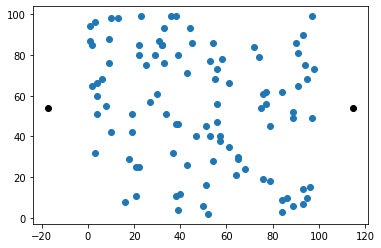

new_lambda 0.5872162836084732
min_lambda inf


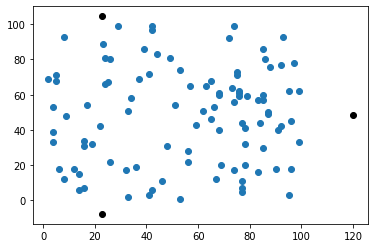

new_lambda 0.5080098917219571
min_lambda 0.5872162836084732


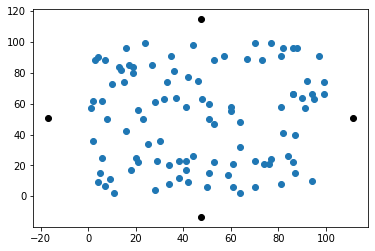

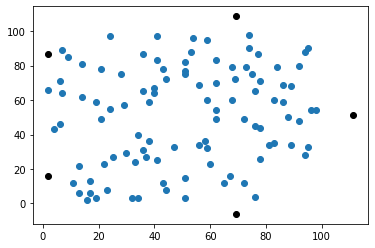

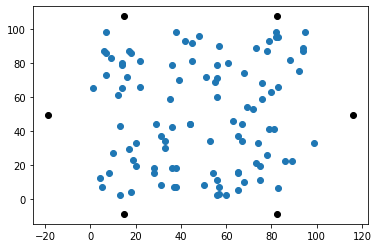

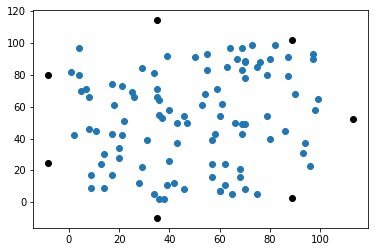

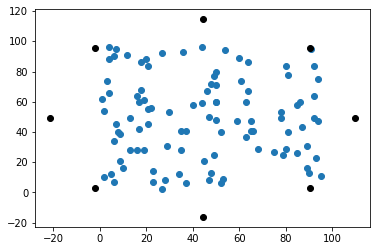

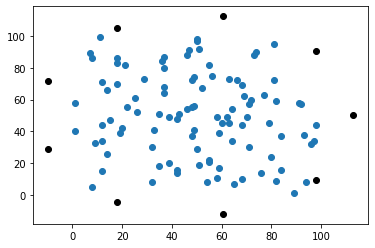

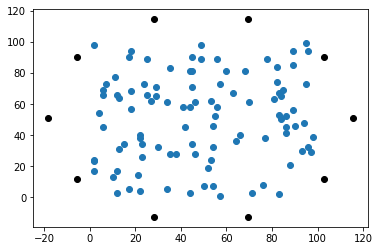

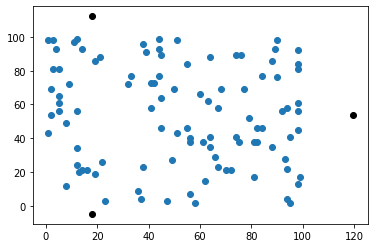

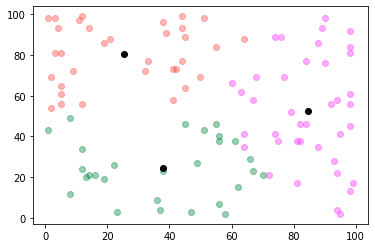

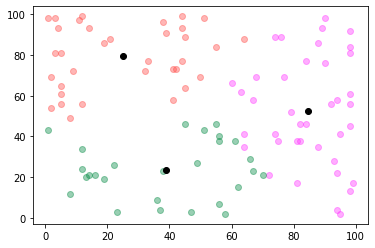

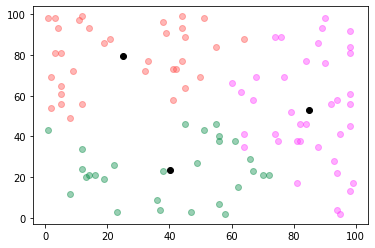

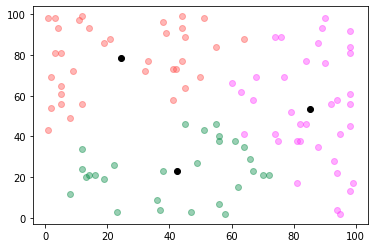

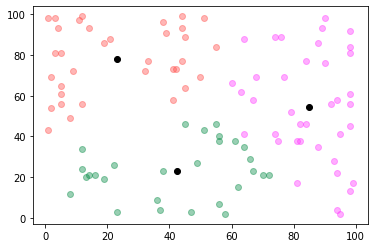

In [21]:
main()